In [1]:
import keras
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import RMSprop
from sklearn import cross_validation
# Splitting the Data Set into two Folds: Training and Testing using train_test_split()
from sklearn.cross_validation import train_test_split
# Tool for calculating MSE
from sklearn.preprocessing import scale
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.
/home/user/assign2/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [134]:
data = pd.read_csv('letter-recognition.data').as_matrix()

In [135]:
x_train = data[:,1:]

In [136]:
y_train = data[:,:1]

In [137]:
X = x_train

In [138]:
Y = y_train

In [139]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=4, train_size=.80, test_size=.20)

In [140]:
X_train = X_train - X_train.mean()

In [141]:
X_test = X_test - X_test.mean()

In [142]:
X_train = X_train/np.std(X_train)
X_test = X_test/np.std(X_test)

In [143]:
batch_size = 64
num_classes = 26
epochs = 10

In [144]:
X_train.shape

(15999, 16)

In [145]:
Y_train[0]

array(['D'], dtype=object)

In [146]:
Y_train_list = []
for letter in Y_train.T[0]:
    Y_train_list.append(ord(letter) - 65)
    

In [147]:
Y_test_list = []
for letter in Y_test.T[0]:
    Y_test_list.append(ord(letter) - 65)

In [176]:
y_train = keras.utils.to_categorical(Y_train_list, num_classes)
y_test = keras.utils.to_categorical(Y_test_list, num_classes)

In [167]:
test_accuracy = {}
train_accuracy = {}

# Model - 1 dense layer

In [149]:
model = Sequential()

In [150]:
model.add(Dense(600, activation='relu', input_shape=(16,)))
model.add(Dense(500, activation='relu'))
model.add(Dense(26, activation='softmax'))

In [151]:
model.compile(optimizer=RMSprop(),
             loss='categorical_crossentropy',
             metrics = ['accuracy'])

In [152]:
model_fit = model.fit(X_train, 
          y_train, 
          batch_size=batch_size, 
          epochs=epochs, 
          validation_split = .2,
         verbose=1)

Train on 12799 samples, validate on 3200 samples
Epoch 1/10
12799/12799 [==============================] - 2s - loss: 1.1610 - acc: 0.6617 - val_loss: 0.7186 - val_acc: 0.7878

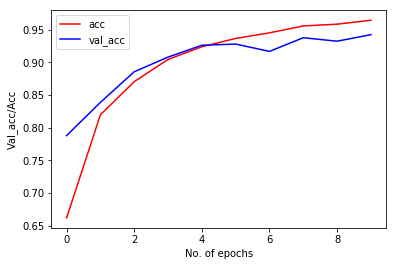

In [153]:
plt.plot( model_fit.epoch,model_fit.history['acc'],'r', label = 'acc')
plt.plot( model_fit.epoch,model_fit.history['val_acc'],'b', label = 'val_acc')
plt.xlabel('No. of epochs')
plt.ylabel('Val_acc/Acc')
plt.legend()

In [154]:
y_hat = model.predict_classes(X_test)

3392/4000 [========================>.....] - ETA: 0s 

In [155]:
y_pred = []
for k in y_hat:
    y_pred.append(chr(k+65))

In [156]:
y_test = []
for k in Y_test.T:
    y_test.append(k)

In [157]:
y_pred = np.array(y_pred)
y_pred

array(['O', 'M', 'B', ..., 'I', 'G', 'J'], 
      dtype='<U1')

In [158]:
pd.crosstab(y_pred, y_test)

col_0,A,B,C,D,E,F,G,H,I,J,...,Q,R,S,T,U,V,W,X,Y,Z
row_0,,,,,,,,,,,,,,,,,,,,,
A,166,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
B,0,120,0,0,4,0,0,0,0,0,...,0,1,1,0,0,1,0,0,0,0
C,0,0,130,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
D,1,0,1,152,0,0,0,2,0,0,...,0,0,0,0,0,0,0,1,0,0
E,0,0,4,0,142,0,0,0,0,0,...,0,0,2,0,0,0,0,0,0,0
F,0,0,0,0,3,141,0,0,0,2,...,0,0,4,0,0,0,0,0,1,1
G,0,1,13,0,3,3,156,1,0,0,...,2,0,2,0,1,1,0,0,0,0
H,0,2,0,0,1,0,0,140,0,0,...,0,0,0,1,0,0,0,0,0,0
I,0,0,0,0,0,2,0,0,130,11,...,0,0,0,0,0,0,0,0,0,0


In [159]:
X_test

array([[-1.338412206467172, -1.6804929288753565, -0.9963314840589876, ...,
        0.7140721279819344, -0.9963314840589876, 0.7140721279819344],
       [-1.6804929288753565, -2.022573651283541, -1.338412206467172, ...,
        0.029910683165565645, -2.022573651283541, 0.7140721279819344],
       [-0.9963314840589876, -1.6804929288753565, -0.6542507616508032, ...,
        0.7140721279819344, 0.029910683165565645, 0.7140721279819344],
       ..., 
       [-0.6542507616508032, 0.7140721279819344, 0.029910683165565645, ...,
        0.37199140557375004, 0.7140721279819344, 0.37199140557375004],
       [0.37199140557375004, 2.766556462431041, -0.31217003924261877, ...,
        0.37199140557375004, 0.37199140557375004, 1.056152850390119],
       [-1.6804929288753565, 0.7140721279819344, -1.338412206467172, ...,
        0.029910683165565645, -1.6804929288753565, 0.029910683165565645]], dtype=object)

In [177]:
y_test

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  1.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  1.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [166]:
evaluation = model.evaluate(X_test , y_test )

3648/4000 [==========================>...] - ETA: 0s

In [169]:
train_accuracy['model_1'] = model_fit.history['acc']
test_accuracy['model_1'] = evaluation[1]

# Model - 2 dense layer

Train on 12799 samples, validate on 3200 samples
Epoch 1/10
12799/12799 [==============================] - 3s - loss: 1.0944 - acc: 0.6580 - val_loss: 0.6021 - val_acc: 0.8134

col_0,A,B,C,D,E,F,G,H,I,J,...,Q,R,S,T,U,V,W,X,Y,Z
row_0,,,,,,,,,,,,,,,,,,,,,
A,169,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,2,0,1,0
B,0,130,0,0,1,0,0,3,0,0,...,0,2,0,0,0,4,0,0,0,0
C,0,0,144,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
D,0,0,0,153,0,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
E,0,1,4,0,155,3,2,2,1,0,...,0,0,3,0,0,0,0,3,0,25
F,0,1,0,0,1,149,1,0,0,0,...,0,0,1,3,0,0,0,0,0,1
G,0,0,1,0,0,1,150,0,0,0,...,2,0,0,0,0,1,0,0,0,0
H,0,0,0,0,0,0,0,138,0,0,...,0,1,0,1,0,0,0,0,0,0
I,0,0,0,0,0,2,0,0,130,6,...,0,0,0,0,0,0,0,0,0,0


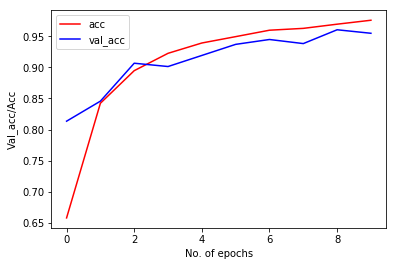

In [170]:
model = Sequential()
model.add(Dense(600, activation='relu', input_shape=(16,)))
model.add(Dense(500, activation='relu'))
model.add(Dense(500, activation='relu'))
model.add(Dense(26, activation='softmax'))
model.compile(optimizer=RMSprop(),
             loss='categorical_crossentropy',
             metrics = ['accuracy'])
model_fit = model.fit(X_train, 
          y_train, 
          batch_size=batch_size, 
          epochs=epochs, 
          validation_split = .2,
         verbose=1)
plt.plot( model_fit.epoch,model_fit.history['acc'],'r', label = 'acc')
plt.plot( model_fit.epoch,model_fit.history['val_acc'],'b', label = 'val_acc')
plt.xlabel('No. of epochs')
plt.ylabel('Val_acc/Acc')
plt.legend()
y_hat = model.predict_classes(X_test)
y_pred = []
for k in y_hat:
    y_pred.append(chr(k+65))
y_test = []
for k in Y_test.T:
    y_test.append(k)
y_pred = np.array(y_pred)
y_pred
pd.crosstab(y_pred, y_test)

In [178]:
y_test

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  1.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  1.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [179]:
evaluation = model.evaluate(X_test , y_test )
train_accuracy['model_2'] = model_fit.history['acc']
test_accuracy['model_2'] = evaluation[1]

3520/4000 [=========================>....] - ETA: 0s

# 3 dense layer

Train on 12799 samples, validate on 3200 samples
Epoch 1/10
12799/12799 [==============================] - 4s - loss: 1.1208 - acc: 0.6471 - val_loss: 0.6515 - val_acc: 0.7844

col_0,A,B,C,D,E,F,G,H,I,J,...,Q,R,S,T,U,V,W,X,Y,Z
row_0,,,,,,,,,,,,,,,,,,,,,
A,168,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
B,0,120,0,0,1,0,1,0,0,0,...,0,2,0,0,0,1,0,0,0,0
C,1,0,144,0,0,0,1,1,0,0,...,0,1,0,1,0,0,0,0,0,0
D,0,1,0,150,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
E,0,2,3,0,155,3,2,0,0,0,...,0,0,1,0,0,0,0,3,0,0
F,0,0,1,0,2,143,0,0,0,0,...,0,0,1,12,0,0,0,0,7,1
G,0,0,0,0,0,3,149,0,0,0,...,1,0,0,0,0,0,0,0,0,0
H,0,4,0,0,0,0,0,140,0,0,...,0,0,0,1,1,0,0,0,0,0
I,0,0,0,0,0,5,0,0,132,4,...,0,0,0,0,0,0,0,0,0,0


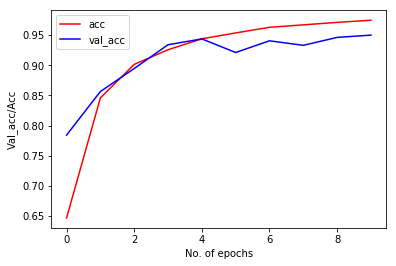

In [180]:
model = Sequential()
model.add(Dense(600, activation='relu', input_shape=(16,)))
model.add(Dense(500, activation='relu'))
model.add(Dense(500, activation='relu'))
model.add(Dense(500, activation='relu'))
model.add(Dense(26, activation='softmax'))
model.compile(optimizer=RMSprop(),
             loss='categorical_crossentropy',
             metrics = ['accuracy'])
model_fit = model.fit(X_train, 
          y_train, 
          batch_size=batch_size, 
          epochs=epochs, 
          validation_split = .2,
         verbose=1)
plt.plot( model_fit.epoch,model_fit.history['acc'],'r', label = 'acc')
plt.plot( model_fit.epoch,model_fit.history['val_acc'],'b', label = 'val_acc')
plt.xlabel('No. of epochs')
plt.ylabel('Val_acc/Acc')
plt.legend()
y_hat = model.predict_classes(X_test)
y_pred = []
for k in y_hat:
    y_pred.append(chr(k+65))
y_test = []
for k in Y_test.T:
    y_test.append(k)
y_pred = np.array(y_pred)
y_pred
pd.crosstab(y_pred, y_test)

In [182]:
y_test = keras.utils.to_categorical(Y_test_list, num_classes)
evaluation = model.evaluate(X_test , y_test )
train_accuracy['model_3'] = model_fit.history['acc']
test_accuracy['model_3'] = evaluation[1]

3936/4000 [============================>.] - ETA: 0s

# 4 dense layer

Train on 12799 samples, validate on 3200 samples
Epoch 1/10
12799/12799 [==============================] - 5s - loss: 1.2233 - acc: 0.6153 - val_loss: 0.6379 - val_acc: 0.7922

col_0,A,B,C,D,E,F,G,H,I,J,...,Q,R,S,T,U,V,W,X,Y,Z
row_0,,,,,,,,,,,,,,,,,,,,,
A,169,0,0,0,0,0,2,1,0,3,...,0,0,1,0,1,0,2,0,1,1
B,0,127,0,0,1,0,0,2,0,0,...,0,3,0,0,0,3,0,0,0,0
C,0,0,143,0,0,0,2,0,0,0,...,0,1,0,0,1,0,0,0,0,0
D,0,1,0,144,0,0,0,1,0,0,...,0,1,0,0,0,0,1,0,0,0
E,0,3,4,0,144,2,4,0,0,0,...,0,0,1,0,0,0,0,2,0,0
F,0,0,1,1,3,144,0,0,0,0,...,0,0,3,0,0,0,0,0,0,1
G,0,0,0,0,0,3,146,1,0,0,...,0,0,0,0,0,1,0,0,0,0
H,0,0,0,4,1,0,2,134,0,0,...,0,0,0,1,0,0,0,0,0,0
I,0,0,0,1,0,2,0,0,133,8,...,0,0,0,0,0,0,0,0,0,0


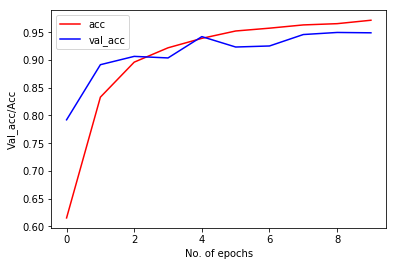

In [107]:
model = Sequential()
model.add(Dense(600, activation='relu', input_shape=(16,)))
model.add(Dense(500, activation='relu'))
model.add(Dense(500, activation='relu'))
model.add(Dense(500, activation='relu'))
model.add(Dense(500, activation='relu'))
model.add(Dense(26, activation='softmax'))
model.compile(optimizer=RMSprop(),
             loss='categorical_crossentropy',
             metrics = ['accuracy'])
model_fit = model.fit(X_train, 
          y_train, 
          batch_size=batch_size, 
          epochs=epochs, 
          validation_split = .2,
         verbose=1)
plt.plot( model_fit.epoch,model_fit.history['acc'],'r', label = 'acc')
plt.plot( model_fit.epoch,model_fit.history['val_acc'],'b', label = 'val_acc')
plt.xlabel('No. of epochs')
plt.ylabel('Val_acc/Acc')
plt.legend()
y_hat = model.predict_classes(X_test)
y_pred = []
for k in y_hat:
    y_pred.append(chr(k+65))
y_test = []
for k in Y_test.T:
    y_test.append(k)
y_pred = np.array(y_pred)
y_pred
pd.crosstab(y_pred, y_test)

In [184]:
y_test = keras.utils.to_categorical(Y_test_list, num_classes)
evaluation = model.evaluate(X_test , y_test )
train_accuracy['model_4'] = model_fit.history['acc']
test_accuracy['model_4'] = evaluation[1]

3808/4000 [===========================>..] - ETA: 0s

# 5 dense layers

Train on 12799 samples, validate on 3200 samples
Epoch 1/10
12799/12799 [==============================] - 7s - loss: 1.4035 - acc: 0.5560 - val_loss: 0.8070 - val_acc: 0.7519

col_0,A,B,C,D,E,F,G,H,I,J,...,Q,R,S,T,U,V,W,X,Y,Z
row_0,,,,,,,,,,,,,,,,,,,,,
A,169,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,1,0
B,0,121,0,0,2,0,0,0,0,0,...,0,2,1,0,0,1,0,0,0,0
C,0,0,139,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
D,0,1,0,144,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
E,0,1,0,0,105,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
F,0,0,0,0,0,143,0,0,0,0,...,0,0,1,4,0,0,0,0,0,0
G,0,1,1,0,8,0,148,0,0,0,...,0,0,1,0,0,0,0,0,0,0
H,0,5,0,1,0,0,1,134,0,0,...,0,3,0,1,0,1,0,0,0,0
I,0,0,0,0,0,4,0,0,135,11,...,0,0,0,0,0,0,0,0,0,0


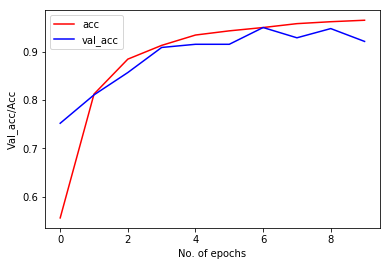

In [185]:
model = Sequential()
model.add(Dense(600, activation='relu', input_shape=(16,)))
model.add(Dense(500, activation='relu'))
model.add(Dense(500, activation='relu'))
model.add(Dense(500, activation='relu'))
model.add(Dense(500, activation='relu'))
model.add(Dense(500, activation='relu'))
model.add(Dense(26, activation='softmax'))
model.compile(optimizer=RMSprop(),
             loss='categorical_crossentropy',
             metrics = ['accuracy'])
model_fit = model.fit(X_train, 
          y_train, 
          batch_size=batch_size, 
          epochs=epochs, 
          validation_split = .2,
         verbose=1)
plt.plot( model_fit.epoch,model_fit.history['acc'],'r', label = 'acc')
plt.plot( model_fit.epoch,model_fit.history['val_acc'],'b', label = 'val_acc')
plt.xlabel('No. of epochs')
plt.ylabel('Val_acc/Acc')
plt.legend()
y_hat = model.predict_classes(X_test)
y_pred = []
for k in y_hat:
    y_pred.append(chr(k+65))
y_test = []
for k in Y_test.T:
    y_test.append(k)
y_pred = np.array(y_pred)
y_pred
pd.crosstab(y_pred, y_test)

In [186]:
y_test = keras.utils.to_categorical(Y_test_list, num_classes)
evaluation = model.evaluate(X_test , y_test )
train_accuracy['model_5'] = model_fit.history['acc']
test_accuracy['model_5'] = evaluation[1]

3712/4000 [==========================>...] - ETA: 0s

# 6 Dense layers

Train on 12799 samples, validate on 3200 samples
Epoch 1/10
12799/12799 [==============================] - 7s - loss: 1.6343 - acc: 0.4824 - val_loss: 0.8227 - val_acc: 0.7284

col_0,A,B,C,D,E,F,G,H,I,J,...,Q,R,S,T,U,V,W,X,Y,Z
row_0,,,,,,,,,,,,,,,,,,,,,
A,166,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
B,0,124,0,0,1,0,0,1,0,0,...,0,2,1,0,0,2,0,0,0,0
C,0,0,139,0,0,0,3,0,0,0,...,0,0,0,0,1,0,0,0,0,0
D,0,2,0,151,0,0,0,5,0,0,...,0,1,1,1,0,0,0,2,0,0
E,0,1,5,0,155,0,1,0,0,0,...,0,0,0,0,0,0,0,5,0,1
F,0,1,1,0,1,140,0,1,0,0,...,0,0,0,2,0,1,0,0,0,0
G,0,0,0,0,0,1,151,0,0,0,...,1,0,0,0,0,0,0,0,0,0
H,0,0,0,0,0,0,0,131,0,0,...,0,0,0,1,2,0,0,0,0,1
I,0,0,2,0,0,9,2,0,133,6,...,0,0,0,2,0,0,0,1,0,0


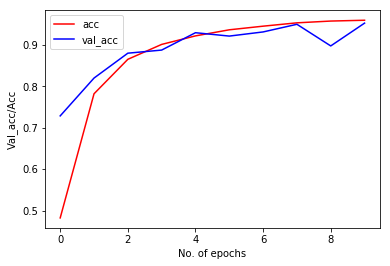

In [109]:
model = Sequential()
model.add(Dense(600, activation='relu', input_shape=(16,)))
model.add(Dense(500, activation='relu'))
model.add(Dense(500, activation='relu'))
model.add(Dense(500, activation='relu'))
model.add(Dense(500, activation='relu'))
model.add(Dense(500, activation='relu'))
model.add(Dense(500, activation='relu'))
model.add(Dense(26, activation='softmax'))
model.compile(optimizer=RMSprop(),
             loss='categorical_crossentropy',
             metrics = ['accuracy'])
model_fit = model.fit(X_train, 
          y_train, 
          batch_size=batch_size, 
          epochs=epochs, 
          validation_split = .2,
         verbose=1)
plt.plot( model_fit.epoch,model_fit.history['acc'],'r', label = 'acc')
plt.plot( model_fit.epoch,model_fit.history['val_acc'],'b', label = 'val_acc')
plt.xlabel('No. of epochs')
plt.ylabel('Val_acc/Acc')
plt.legend()
y_hat = model.predict_classes(X_test)
y_pred = []
for k in y_hat:
    y_pred.append(chr(k+65))
y_test = []
for k in Y_test.T:
    y_test.append(k)
y_pred = np.array(y_pred)
y_pred
pd.crosstab(y_pred, y_test)

In [187]:
y_test = keras.utils.to_categorical(Y_test_list, num_classes)
evaluation = model.evaluate(X_test , y_test )
train_accuracy['model_6'] = model_fit.history['acc']
test_accuracy['model_6'] = evaluation[1]

3744/4000 [===========================>..] - ETA: 0s

# 7 Dense layers

Train on 12799 samples, validate on 3200 samples
Epoch 1/10
12799/12799 [==============================] - 8s - loss: 1.8090 - acc: 0.4264 - val_loss: 1.0479 - val_acc: 0.6919

col_0,A,B,C,D,E,F,G,H,I,J,...,Q,R,S,T,U,V,W,X,Y,Z
row_0,,,,,,,,,,,,,,,,,,,,,
A,167,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
B,0,123,0,3,4,1,0,1,0,0,...,0,1,1,1,0,5,0,0,0,0
C,0,0,145,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
D,0,0,0,137,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
E,0,2,0,0,149,1,4,0,0,0,...,0,0,1,0,0,0,0,0,0,0
F,0,0,0,1,0,131,0,0,0,0,...,0,0,0,0,0,0,0,0,2,0
G,0,0,0,0,0,1,142,0,0,0,...,0,0,0,0,0,1,0,0,0,0
H,0,1,0,0,0,0,0,130,0,0,...,0,0,0,1,0,0,0,0,0,0
I,0,0,0,4,1,14,2,0,136,11,...,0,0,0,0,0,0,0,5,0,0


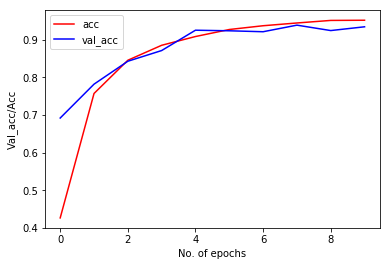

In [188]:
model = Sequential()
model.add(Dense(600, activation='relu', input_shape=(16,)))
model.add(Dense(500, activation='relu'))
model.add(Dense(500, activation='relu'))
model.add(Dense(500, activation='relu'))
model.add(Dense(500, activation='relu'))
model.add(Dense(500, activation='relu'))
model.add(Dense(500, activation='relu'))
model.add(Dense(500, activation='relu'))
model.add(Dense(26, activation='softmax'))
model.compile(optimizer=RMSprop(),
             loss='categorical_crossentropy',
             metrics = ['accuracy'])
model_fit = model.fit(X_train, 
          y_train, 
          batch_size=batch_size, 
          epochs=epochs, 
          validation_split = .2,
         verbose=1)
plt.plot( model_fit.epoch,model_fit.history['acc'],'r', label = 'acc')
plt.plot( model_fit.epoch,model_fit.history['val_acc'],'b', label = 'val_acc')
plt.xlabel('No. of epochs')
plt.ylabel('Val_acc/Acc')
plt.legend()
y_hat = model.predict_classes(X_test)
y_pred = []
for k in y_hat:
    y_pred.append(chr(k+65))
y_test = []
for k in Y_test.T:
    y_test.append(k)
y_pred = np.array(y_pred)
y_pred
pd.crosstab(y_pred, y_test)

In [189]:
y_test = keras.utils.to_categorical(Y_test_list, num_classes)
evaluation = model.evaluate(X_test , y_test )
train_accuracy['model_7'] = model_fit.history['acc']
test_accuracy['model_7'] = evaluation[1]

3936/4000 [============================>.] - ETA: 0s

# 8 dense layers

Train on 12799 samples, validate on 3200 samples
Epoch 1/10
12799/12799 [==============================] - 10s - loss: 2.0388 - acc: 0.3424 - val_loss: 1.3951 - val_acc: 0.5684

col_0,A,B,C,D,E,F,G,H,I,J,...,Q,R,S,T,U,V,W,X,Y,Z
row_0,,,,,,,,,,,,,,,,,,,,,
A,164,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
B,0,117,0,0,1,0,0,0,0,0,...,0,2,0,0,0,2,0,0,0,0
C,0,0,143,0,0,0,7,0,0,0,...,0,0,0,0,0,0,0,0,0,0
D,0,0,0,121,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
E,0,1,4,0,141,0,0,0,0,0,...,0,0,0,0,0,0,0,3,0,7
F,0,0,0,11,2,122,1,1,2,0,...,0,0,1,0,0,0,0,0,0,0
G,0,0,0,0,3,1,139,0,0,0,...,0,0,0,0,0,0,0,0,0,0
H,0,4,0,6,0,0,1,141,0,0,...,0,4,0,1,1,0,0,0,0,0
I,0,0,0,0,0,0,1,0,117,1,...,0,0,0,0,0,0,0,1,0,0


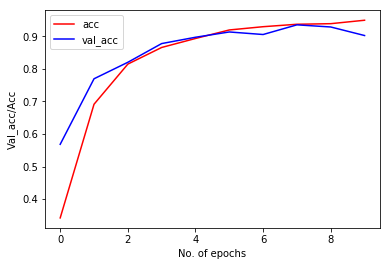

In [190]:
model = Sequential()
model.add(Dense(600, activation='relu', input_shape=(16,)))
model.add(Dense(500, activation='relu'))
model.add(Dense(500, activation='relu'))
model.add(Dense(500, activation='relu'))
model.add(Dense(500, activation='relu'))
model.add(Dense(500, activation='relu'))
model.add(Dense(500, activation='relu'))
model.add(Dense(500, activation='relu'))
model.add(Dense(500, activation='relu'))
model.add(Dense(26, activation='softmax'))
model.compile(optimizer=RMSprop(),
             loss='categorical_crossentropy',
             metrics = ['accuracy'])
model_fit = model.fit(X_train, 
          y_train, 
          batch_size=batch_size, 
          epochs=epochs, 
          validation_split = .2,
         verbose=1)
plt.plot( model_fit.epoch,model_fit.history['acc'],'r', label = 'acc')
plt.plot( model_fit.epoch,model_fit.history['val_acc'],'b', label = 'val_acc')
plt.xlabel('No. of epochs')
plt.ylabel('Val_acc/Acc')
plt.legend()
y_hat = model.predict_classes(X_test)
y_pred = []
for k in y_hat:
    y_pred.append(chr(k+65))
y_test = []
for k in Y_test.T:
    y_test.append(k)
y_pred = np.array(y_pred)
y_pred
pd.crosstab(y_pred, y_test)

In [191]:
y_test = keras.utils.to_categorical(Y_test_list, num_classes)
evaluation = model.evaluate(X_test , y_test )
train_accuracy['model_8'] = model_fit.history['acc']
test_accuracy['model_8'] = evaluation[1]

4000/4000 [==============================] - 0s     


# 9 dense layers

Train on 12799 samples, validate on 3200 samples
Epoch 1/10
12799/12799 [==============================] - 11s - loss: 2.3285 - acc: 0.2414 - val_loss: 1.5563 - val_acc: 0.4450

col_0,A,B,C,D,E,F,G,H,I,J,...,Q,R,S,T,U,V,W,X,Y,Z
row_0,,,,,,,,,,,,,,,,,,,,,
A,166,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
B,0,125,0,1,1,0,1,3,0,0,...,1,7,1,1,0,2,0,0,0,0
C,0,0,142,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
D,0,1,0,144,0,1,0,2,0,0,...,0,0,0,0,0,0,0,1,0,0
E,0,0,1,0,143,2,6,0,0,0,...,0,0,1,0,0,0,0,0,0,0
F,0,0,0,0,2,143,0,0,0,0,...,0,0,3,4,0,0,0,0,0,0
G,0,2,2,1,1,1,138,0,0,0,...,0,0,0,0,0,1,2,0,0,0
H,0,0,0,0,1,0,1,130,0,0,...,0,0,0,1,1,0,0,0,0,0
I,0,0,0,0,0,5,0,0,128,0,...,0,0,0,0,0,0,0,0,0,0


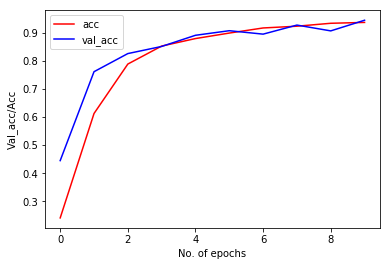

In [192]:
model = Sequential()
model.add(Dense(600, activation='relu', input_shape=(16,)))
model.add(Dense(500, activation='relu'))
model.add(Dense(500, activation='relu'))
model.add(Dense(500, activation='relu'))
model.add(Dense(500, activation='relu'))
model.add(Dense(500, activation='relu'))
model.add(Dense(500, activation='relu'))
model.add(Dense(500, activation='relu'))
model.add(Dense(500, activation='relu'))
model.add(Dense(500, activation='relu'))
model.add(Dense(26, activation='softmax'))
model.compile(optimizer=RMSprop(),
             loss='categorical_crossentropy',
             metrics = ['accuracy'])
model_fit = model.fit(X_train, 
          y_train, 
          batch_size=batch_size, 
          epochs=epochs, 
          validation_split = .2,
         verbose=1)
plt.plot( model_fit.epoch,model_fit.history['acc'],'r', label = 'acc')
plt.plot( model_fit.epoch,model_fit.history['val_acc'],'b', label = 'val_acc')
plt.xlabel('No. of epochs')
plt.ylabel('Val_acc/Acc')
plt.legend()
y_hat = model.predict_classes(X_test)
y_pred = []
for k in y_hat:
    y_pred.append(chr(k+65))
y_test = []
for k in Y_test.T:
    y_test.append(k)
y_pred = np.array(y_pred)
y_pred
pd.crosstab(y_pred, y_test)

In [193]:
y_test = keras.utils.to_categorical(Y_test_list, num_classes)
evaluation = model.evaluate(X_test , y_test )
train_accuracy['model_9'] = model_fit.history['acc']
test_accuracy['model_9'] = evaluation[1]

4000/4000 [==============================] - 1s     

# 10 dense layers

Train on 12799 samples, validate on 3200 samples
Epoch 1/10
12799/12799 [==============================] - 12s - loss: 2.5763 - acc: 0.1550 - val_loss: 2.2619 - val_acc: 0.2022

col_0,A,B,C,D,E,F,G,H,I,J,...,Q,R,S,T,U,V,W,X,Y,Z
row_0,,,,,,,,,,,,,,,,,,,,,
A,165,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
B,0,123,0,1,4,1,0,2,0,0,...,0,9,4,1,0,2,0,0,0,0
C,0,0,144,0,0,0,28,0,0,0,...,0,0,0,0,0,0,0,0,0,0
D,1,2,0,148,0,0,1,10,0,0,...,0,2,0,0,1,0,0,1,0,0
E,0,0,2,0,146,0,2,0,0,0,...,0,0,2,0,0,0,0,0,0,3
F,0,0,0,0,0,129,0,0,0,0,...,0,0,0,3,0,0,0,0,0,0
G,0,0,0,0,1,0,121,0,0,0,...,1,0,1,0,0,1,0,0,0,0
H,1,2,0,1,0,0,2,129,0,0,...,0,6,0,1,1,0,0,0,0,0
I,0,0,0,0,1,4,0,0,132,5,...,0,0,2,0,0,0,0,0,0,0


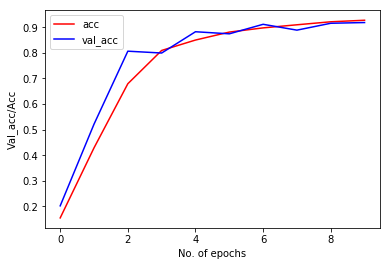

In [194]:
model = Sequential()
model.add(Dense(600, activation='relu', input_shape=(16,)))
model.add(Dense(500, activation='relu'))
model.add(Dense(500, activation='relu'))
model.add(Dense(500, activation='relu'))
model.add(Dense(500, activation='relu'))
model.add(Dense(500, activation='relu'))
model.add(Dense(500, activation='relu'))
model.add(Dense(500, activation='relu'))
model.add(Dense(500, activation='relu'))
model.add(Dense(500, activation='relu'))
model.add(Dense(500, activation='relu'))
model.add(Dense(26, activation='softmax'))
model.compile(optimizer=RMSprop(),
             loss='categorical_crossentropy',
             metrics = ['accuracy'])
model_fit = model.fit(X_train, 
          y_train, 
          batch_size=batch_size, 
          epochs=epochs, 
          validation_split = .2,
         verbose=1)
plt.plot( model_fit.epoch,model_fit.history['acc'],'r', label = 'acc')
plt.plot( model_fit.epoch,model_fit.history['val_acc'],'b', label = 'val_acc')
plt.xlabel('No. of epochs')
plt.ylabel('Val_acc/Acc')
plt.legend()
y_hat = model.predict_classes(X_test)
y_pred = []
for k in y_hat:
    y_pred.append(chr(k+65))
y_test = []
for k in Y_test.T:
    y_test.append(k)
y_pred = np.array(y_pred)
y_pred
pd.crosstab(y_pred, y_test)

In [195]:
y_test = keras.utils.to_categorical(Y_test_list, num_classes)
evaluation = model.evaluate(X_test , y_test )
train_accuracy['model_10'] = model_fit.history['acc']
test_accuracy['model_10'] = evaluation[1]

3808/4000 [===========================>..] - ETA: 0s

In [204]:
train_acc = [train_accuracy['model_1'][9],train_accuracy['model_2'][9],train_accuracy['model_3'][9],train_accuracy['model_4'][9],train_accuracy['model_5'][9],train_accuracy['model_6'][9],train_accuracy['model_7'][9],train_accuracy['model_8'][9],train_accuracy['model_9'][9],train_accuracy['model_10'][9]]

In [205]:
train_acc

[0.96460660990071168,
 0.97562309556365412,
 0.97468552232040107,
 0.97468552232040107,
 0.96507539654329466,
 0.96507539654329466,
 0.95179310885059876,
 0.94944917573548082,
 0.93601062584411387,
 0.92710368000293986]

In [209]:
layers = [i for i in range(1,11)]

In [210]:
layers

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [222]:
test_acc = []
for k in test_accuracy:
    test_acc.append(test_accuracy[k])

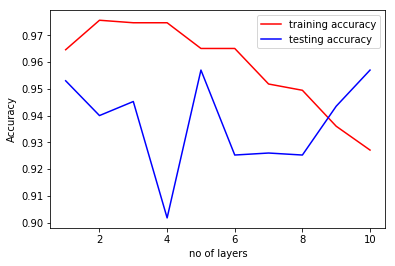

In [223]:
plt.plot(layers, train_acc,'r', label = 'training accuracy')
plt.plot(layers, test_acc,'b', label = 'testing accuracy')
plt.xlabel("no of layers")
plt.ylabel("Accuracy")
plt.legend()

In [231]:
z = [keras.callbacks.EarlyStopping(monitor="val_acc", min_delta=0.01, patience=3, verbose=1, mode='max')]
y_train.shape

(15999, 26)

In [232]:
model_fit = model.fit(X_train, 
          y_train, 
          batch_size = batch_size, 
          epochs = epochs, 
          validation_split = .2,
          verbose = 2,
          callbacks = z
)

Train on 12799 samples, validate on 3200 samples
Epoch 1/10
10s - loss: 0.3716 - acc: 0.9299 - val_loss: 0.3580 - val_acc: 0.9225
Epoch 2/10
10s - loss: 0.2944 - acc: 0.9400 - val_loss: 0.9376 - val_acc: 0.8928
Epoch 3/10
10s - loss: 0.3163 - acc: 0.9373 - val_loss: 0.5080 - val_acc: 0.9203
Epoch 4/10
10s - loss: 0.3491 - acc: 0.9383 - val_loss: 0.7545 - val_acc: 0.8647
Epoch 5/10
10s - loss: 0.3523 - acc: 0.9309 - val_loss: 0.4659 - val_acc: 0.9209
Epoch 00004: early stopping
